# Plots to generate supplementary figures for TP53 classifier figure

**Gregory Way, 2018**

The figures consist of TP53 classifier scores stratified by TP53 inactivation status and cancer-type.

There are two sets of plots generated:

1. Cancer-types for which TP53 loss of function events are on either extreme of proportions.
  * OV and UCS have a high percentage of TP53 loss events
  * THCA and UVM have a low percentage of TP53 loss events
  * The figure demonstrates that even in cancer-types with extreme values (and that they were not even included in model training) the classifier can detect TP53 inactivation
2. Cancer-types for which TP53 loss events are enriched in specific subtypes.
  * Basal BRCA subtype tumors often have TP53 mutations
  * UCEC subtypes have different proportions of TP53 loss events as well.
  * The figure shows how subtype assignments do not confound TP53 classifier predictions within cancer-types

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('seaborn-notebook')

In [3]:
sns.set(style='white')
sns.set_context('paper', rc={'font.size':16, 'axes.titlesize':11, 'axes.labelsize':20,
                             'xtick.labelsize':18, 'ytick.labelsize':14})

In [4]:
def random_guess_line(**kwargs):
    plt.axhline(y=0.5, color='k', ls='dashed', linewidth=0.7)

In [5]:
# The prediction file stores the TP53 classifier scores for all samples
prediction_file = os.path.join('..', 'classifiers', 'TP53', 'tables',
                               'mutation_classification_scores.tsv')
prediction_df = pd.read_table(prediction_file, index_col=0)
prediction_df.head(2)

,log10_mut,total_status,weight,TP53,TP53_loss,PATIENT_BARCODE,DISEASE,SUBTYPE,hypermutated,include,ID.1,Tumor_Sample_Barcode,Hugo_Symbol,HGVSc,HGVSp,Variant_Classification
ID,,,,,,,,,,,,,,,,
TCGA-02-0047-01,1.812913,0.0,0.723395,0.0,0.0,TCGA-02-0047,GBM,IDHwt,0.0,1.0,TCGA-02-0047-01,NaN,NaN,NaN,NaN,Wild-Type
TCGA-02-0055-01,1.707570,1.0,0.698910,1.0,0.0,TCGA-02-0055,GBM,IDHwt,0.0,1.0,TCGA-02-0055-01,TCGA-02-0055-01A-01D-1490-08,TP53,c.646G>A,p.Val216Met,Missense_Mutation


## Predictions for cancer-types with extreme proportions of TP53 loss of function events

* Samples that are heavily TP53 mutated or copy number lost: OV, UCS
* Samples that are heavily TP53 wild-type: THCA, UVM

Note that these samples were not used in training the classifier.

In [6]:
extreme_types = ['OV', 'UCS', 'THCA', 'UVM']
extreme_df =  prediction_df[prediction_df['DISEASE'].isin(extreme_types)]

<Figure size 144x432 with 0 Axes>

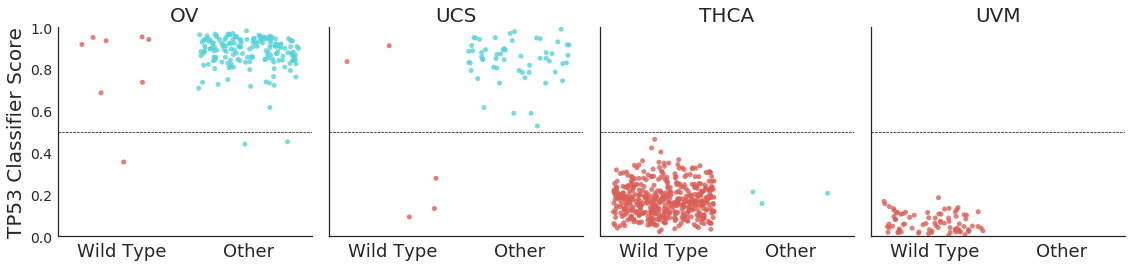

In [7]:
figure_name = os.path.join('..', 'figures', 'TP53_opposite_spectrum_cancertypes.pdf')
plt.figure(figsize=(2, 6))
g = sns.factorplot(x='total_status', y='weight', col='DISEASE', data=extreme_df,
                   palette="hls", col_order=extreme_types, kind='strip', jitter=0.4,
                   alpha=0.8)
g.map(random_guess_line)
(g.set_axis_labels('', 'TP53 Classifier Score')
  .set_xticklabels(['Wild Type', 'Other'])
  .set_titles("{col_name}")
  .set(ylim=(0, 1)))
plt.tight_layout()
plt.savefig(figure_name, dpi=600, bbox_inchex='tight');

## Predictions for cancer-types that have differential proportions of TP53 alterations according to subtype

These include: BRCA and UCEC

In [8]:
brca_df =  prediction_df[prediction_df['DISEASE'] == 'BRCA']
ucec_df =  prediction_df[prediction_df['DISEASE'] == 'UCEC']

In [9]:
def plot_subtype(df, title):
    ax = sns.stripplot(x='SUBTYPE', y='weight', hue='total_status',
                   data=df,  dodge=True,
                   palette='hls', edgecolor='black',
                   jitter=0.3, alpha=0.8)
    plt.axhline(0.5, color='black', linestyle='dashed', linewidth=1)
    ax.set_ylabel('TP53 Classifier Score')
    ax.legend_.remove()
    ax.set_title(title, size=19)
    sns.despine()
    plt.tight_layout()

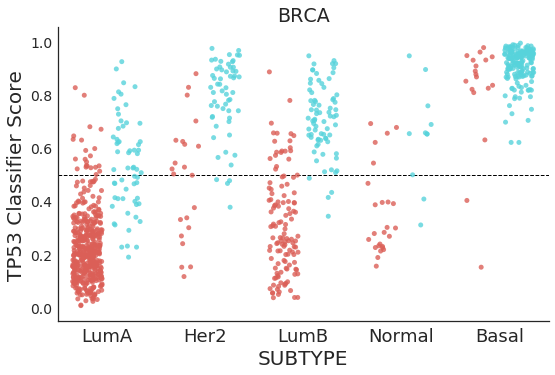

In [10]:
brca_file_name = os.path.join('..', 'figures', 'TP53_BRCA_subtype_confounding.pdf')
plot_subtype(brca_df, 'BRCA')
plt.savefig(brca_file_name, dpi=600, bbox_inchex='tight')

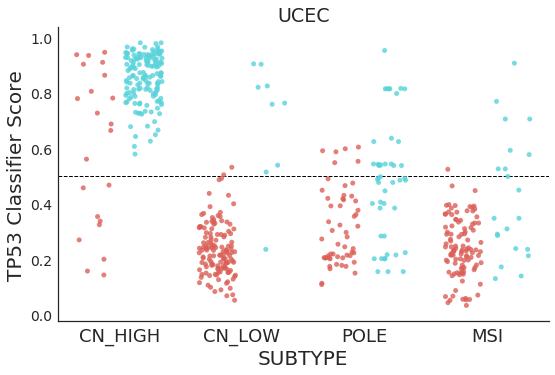

In [11]:
ucec_file_name = os.path.join('..', 'figures', 'TP53_UCEC_subtype_confounding.pdf')
plot_subtype(ucec_df, 'UCEC')
plt.savefig(ucec_file_name, dpi=600, bbox_inchex='tight')